In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Data/Raw/Daily_Climate_time_series.csv', parse_dates=['date'], index_col=['date'])

In [3]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1575.000000,1575.000000,1575.000000,1575.000000
mean,25.231582,60.420115,6.903642,1010.589745
std,7.337316,16.956083,4.508803,175.298310
min,6.000000,13.428571,0.000000,-3.041667
25%,18.516667,49.750000,3.700000,1001.875000
50%,27.166667,62.380952,6.370000,1009.000000
75%,31.142857,72.125000,9.262500,1015.183334
max,38.714286,98.000000,42.220000,7679.333333


In [4]:
data = data[(data['meanpressure'] > 950) & (data['meanpressure'] < 1090)]

Text(0.5, 0, 'Date')

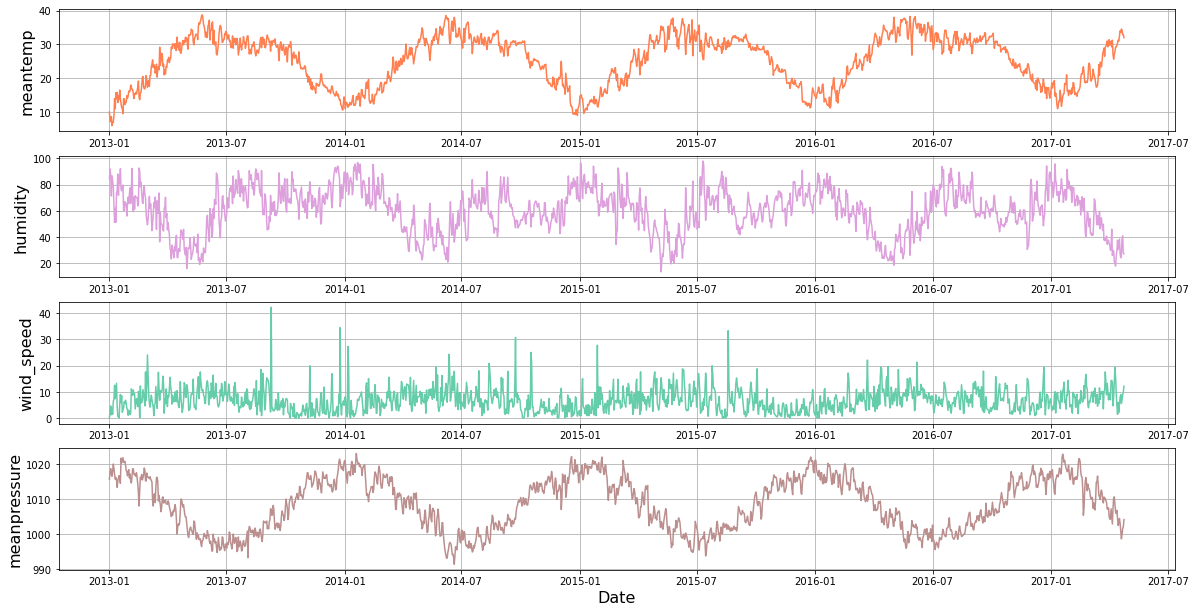

In [5]:
plt.figure(figsize=(20, 13))
colors = ['#FF7F50', '#DDA0DD', '#66CDAA', '#BC8F8F']
for i, j in enumerate(data.columns):
    plt.subplot(len(data.columns) + 1, 1, i + 1)
    plt.plot(data[j], color=colors[i]);
    plt.ylabel(j, fontsize=16)
    plt.grid()
plt.xlabel('Date', fontsize=16)

In [6]:
data.shape

(1565, 4)

In [7]:
data = pd.read_csv('../Data/Raw/Daily_Climate_time_series.csv', parse_dates=['date'])

In [8]:
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1570,2017-04-20,34.500000,27.500000,5.562500,998.625000
1571,2017-04-21,34.250000,39.375000,6.962500,999.875000
1572,2017-04-22,32.900000,40.900000,8.890000,1001.600000
1573,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [9]:
def time_features(df, date_columns):
    
    df['Year'] = pd.to_datetime(df[date_columns]).dt.year
    df['Month'] = pd.to_datetime(df[date_columns]).dt.month
    df['Day'] = pd.to_datetime(df[date_columns]).dt.day
    df['Weekday'] = pd.to_datetime(df[date_columns]).dt.weekday
    
    return df

In [10]:
data = time_features(data, 'date')

In [11]:
data.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure', 'Year',
       'Month', 'Day', 'Weekday'],
      dtype='object')

In [12]:
columns ={'meantemp', 'humidity', 'wind_speed', 'meanpressure', 'Year', 'Month', 'Day', 'Weekday'}

In [13]:
def minmax(data):
    for col in columns:
        scaler = MinMaxScaler(feature_range = (0,1))
        data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))
    return data

In [14]:
Climate_data = minmax(data)

In [15]:
Climate_data.head()

,date,meantemp,humidity,wind_speed,meanpressure,Year,Month,Day,Weekday
0,2013-01-01,0.122271,0.840372,0.000000,0.132603,0.0,0.0,0.000000,0.166667
1,2013-01-02,0.042795,0.929054,0.070583,0.132881,0.0,0.0,0.033333,0.333333
2,2013-01-03,0.035662,0.869932,0.109743,0.132994,0.0,0.0,0.066667,0.500000
3,2013-01-04,0.081514,0.684685,0.029212,0.132799,0.0,0.0,0.100000,0.666667
4,2013-01-05,0.000000,0.867962,0.087636,0.132712,0.0,0.0,0.133333,0.833333


In [16]:
#Climate_data.to_csv('../Data/Processed/Climate_data.csv', index = False)